In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
plt.style.use('seaborn')

# Data Preparation

In [3]:
mean1 = np.array([1, 0.5])
cov1 = np.array([[1, 0.1], [0.1, 1.2]])

mean2 = np.array([4, 5])
cov2 = np.array([[1.21, 0.1], [0.1, 1.3]])

# Normal distribution
dist1 = np.random.multivariate_normal(mean1, cov1, 500)
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

In [4]:
print(dist1.shape, dist2.shape)

(500, 2) (500, 2)


# Data Visualisation

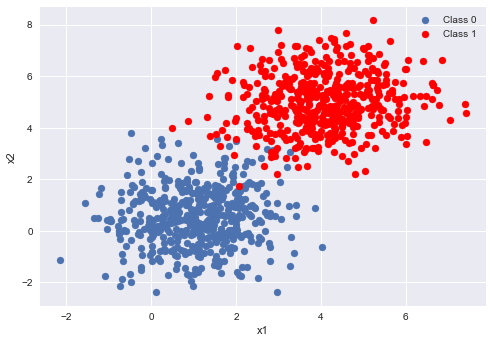

In [5]:
plt.scatter(dist1[:, 0], dist1[:, 1], label = 'Class 0')
plt.scatter(dist2[:, 0], dist2[:, 1], label = 'Class 1', c='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Create Training and Test Set

In [6]:
data = np.zeros((1000, 3))
print(data.shape)

(1000, 3)


In [7]:
data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:, -1] = 1.0

In [8]:
np.random.shuffle(data)
print(data[:10])

[[-3.96818476e-01  1.16761025e+00  0.00000000e+00]
 [-2.33646375e-01 -1.38651003e+00  0.00000000e+00]
 [ 3.37839338e+00  3.19358076e+00  1.00000000e+00]
 [ 3.81479814e+00  4.59065504e+00  1.00000000e+00]
 [ 4.27763029e+00  5.28135896e+00  1.00000000e+00]
 [ 4.12804032e+00  6.74978791e+00  1.00000000e+00]
 [ 3.69298302e+00  5.69881846e+00  1.00000000e+00]
 [ 2.62920230e+00  5.16653372e+00  1.00000000e+00]
 [ 9.73983407e-01  4.45982183e-03  0.00000000e+00]
 [ 1.03501313e+00  1.87556440e+00  0.00000000e+00]]


In [9]:
split = int(0.8*data.shape[0])

In [10]:
xTrain = data[:split, :-1] 
xTest = data[split:, :-1]

yTrain = data[:split, -1]
yTest = data[split:, -1]

print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(800, 2) (800,)
(200, 2) (200,)


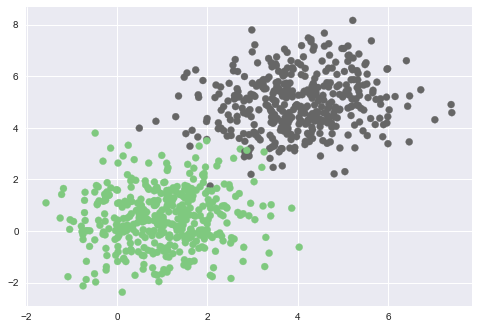

In [11]:
plt.scatter(xTrain[:, 0], xTrain[:, 1], c = yTrain, cmap = plt.cm.Accent)
plt.show()

# Data Normalisation

In [12]:
u = np.mean(xTrain, axis=0)
std = np.std(xTrain, axis=0)

# Apply the transformation
xTrain = (xTrain - u)/std

# Apply the same transformation on test data
xTest = (xTest - u)/std

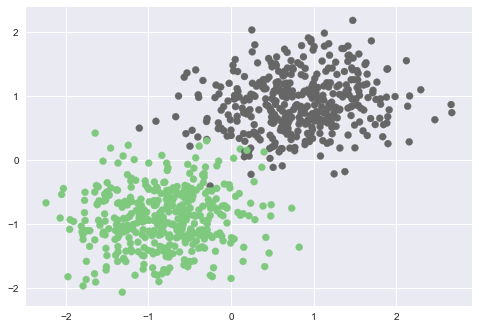

In [13]:
plt.scatter(xTrain[:, 0], xTrain[:, 1], c = yTrain, cmap = plt.cm.Accent)
plt.show()

# Logistic Regression Functions

In [14]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [15]:
def hypothesis(x, theta):
    '''
        x - entire array (m, n+1)
        theta - np.array((n+1, 1))
    '''
    return sigmoid(np.dot(x, theta))

In [16]:
def error(x, y, theta):
    '''
        x - entire array (m, n+1)
        y - (m, 1)
        theta - np.array((n+1, 1))

        return :
            scalar value (loss)
    '''
    y_ = hypothesis(x, theta)
    e = -1*np.mean((y * np.log(y_) + ((1 - y) * np.log(1 - y_))))

    return e

In [17]:
def gradient(x, y, theta):
    '''
        x - entire array (m, n+1)
        y - (m, 1)
        theta - np.array((n+1, 1))

        return :
            gradient vector (n+1, 1)
    '''
    y_ = hypothesis(x, theta)
    grad = -np.dot(x.T, (y - y_))

    return grad / x.shape[0]

In [18]:
def gradientDescent(x, y, learningRate = 0.1, maxSteps = 300):
    n = x.shape[1]
    theta = np.zeros((n, 1))
    errorList = []

    for i in range(maxSteps):
        e = error(x, y, theta)
        errorList.append(e)

        grad = gradient(x, y, theta)
        theta = theta - learningRate * grad

    return theta, errorList

In [19]:
xTrain.shape

(800, 2)

In [20]:
ones = np.ones((xTrain.shape[0], 1))
xNewTrain = np.hstack((ones, xTrain))
print(xNewTrain.shape)
print(xNewTrain[:5])

yTrain = yTrain.reshape((-1, 1))

(800, 3)
[[ 1.         -1.59839247 -0.63705584]
 [ 1.         -1.50919838 -1.66480355]
 [ 1.          0.46523607  0.17817067]
 [ 1.          0.7037862   0.7403368 ]
 [ 1.          0.95678224  1.01826787]]


In [21]:
theta, errorList = gradientDescent(xNewTrain, yTrain)

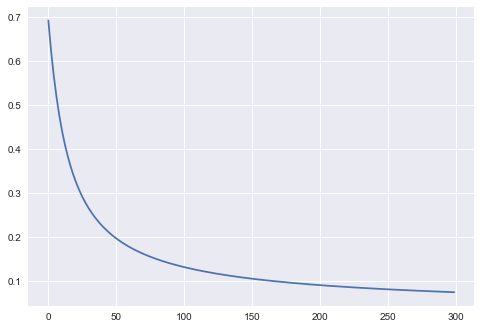

In [22]:
plt.plot(errorList)
plt.show()

In [23]:
theta, errorList = gradientDescent(xNewTrain, yTrain, learningRate= 0.5)

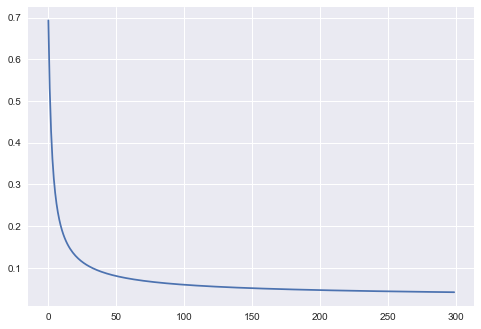

In [24]:
plt.plot(errorList)
plt.show()

In [25]:
theta, errorList = gradientDescent(xNewTrain, yTrain, learningRate= 1)

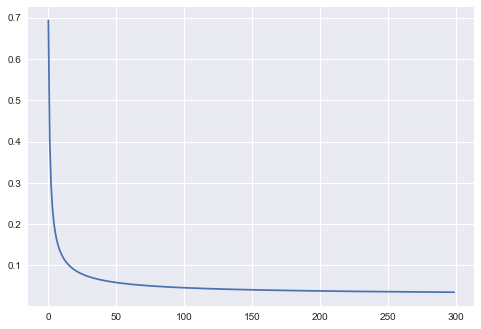

In [26]:
plt.plot(errorList)
plt.show()

In [27]:
theta, errorList = gradientDescent(xNewTrain, yTrain, learningRate= 5)

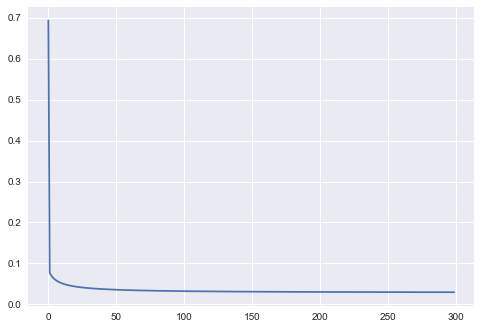

In [28]:
plt.plot(errorList)
plt.show()

# Visualise Decision Surface

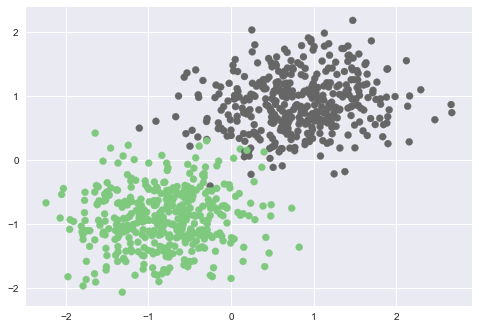

In [29]:
plt.scatter(xTrain[:, 0], xTrain[:, 1], c = yTrain.reshape((-1,)), cmap = plt.cm.Accent)
plt.show()

In [30]:
x1 = np.arange(-3, 4)

x2 = -(theta[0] + theta[1] * x1) / theta[2]

print(x1)
print(x2)

[-3 -2 -1  0  1  2  3]
[ 1.37576628  0.92222669  0.46868709  0.0151475  -0.4383921  -0.8919317
 -1.34547129]


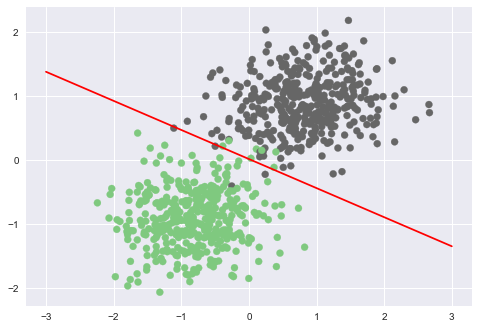

In [31]:
plt.scatter(xTrain[:, 0], xTrain[:, 1], c = yTrain.reshape((-1,)), cmap = plt.cm.Accent)
plt.plot(x1, x2, c = 'r')
plt.show()

# Prediction and Accuracy

In [32]:
def predict(x, theta):
    y_ = hypothesis(x, theta)
    output = np.zeros(y_.shape)
    output[y_ >= 0.5] = 1
    output = output.astype('int')

    return output

In [33]:
ones = np.ones((xTest.shape[0], 1))
xNewTest = np.hstack((ones, xTest))
print(xNewTest.shape)
print(xNewTest[:5])

(200, 3)
[[ 1.         -0.85896622 -0.51773333]
 [ 1.         -1.46386236 -0.58323641]
 [ 1.          0.21545115  1.02135931]
 [ 1.         -1.22792801 -0.97484192]
 [ 1.         -0.31470644 -1.17929288]]


In [34]:
xTrainPreds  = predict(xNewTrain, theta)
xTestPreds = predict(xNewTest, theta)

In [35]:
def accuracy(actual, preds):
    actual = actual.astype('int')
    actual = actual.reshape((-1, 1))
    acc = np.sum(actual == preds) / actual.shape[0]

    return acc * 100

In [36]:
accuracy(yTrain, xTrainPreds)

98.625

In [37]:
accuracy(yTest, xTestPreds)

98.5

# How to use skLearn?

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
model.fit(xTrain, yTrain)

LogisticRegression()

In [41]:
print(model.intercept_)
print(model.coef_)

[0.03637263]
[[2.47405922 4.6389807 ]]


In [42]:
model.score(xTrain, yTrain)

0.98625

In [43]:
model.score(xTest, yTest)

0.985